In [1]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.io import loadmat
from sklearn import svm
%matplotlib inline
sns.set()
sns.set_style('white')
#warnings.filterwarnings('ignore')

In [2]:
data1 = loadmat('ex6data1')
x, y = data1['X'], data1['y']
pos = np.array(list(x[number] for number in range(x.shape[0]) if y[number] == 1))
neg = np.array(list(x[number] for number in range(x.shape[0]) if y[number] == 0))

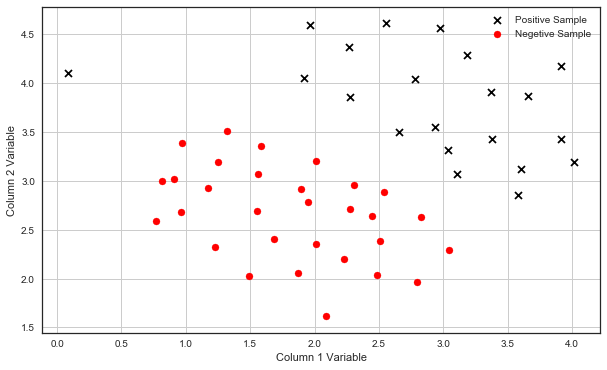

In [3]:
def plotData():
    plt.figure(figsize=(10, 6))
    plt.scatter(pos[:, 0], pos[:, 1], marker = 'x', label = 'Positive Sample', color = 'black')
    plt.scatter(neg[:, 0], neg[:, 1], marker = 'o', label = 'Negetive Sample', color = 'red')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)
    
plotData()

In [4]:
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    xvals = np.linspace(xmin, xmax, 100)
    yvals = np.linspace(ymin, ymax, 100)
    zvals = np.zeros((len(xvals), len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = my_svm.predict(np.array([xvals[i], yvals[j]]).reshape(1, -1))
    zvals = zvals.transpose()

    mycontour = plt.contour(xvals, yvals, zvals, [0])
    plt.title("Decision Boundary")

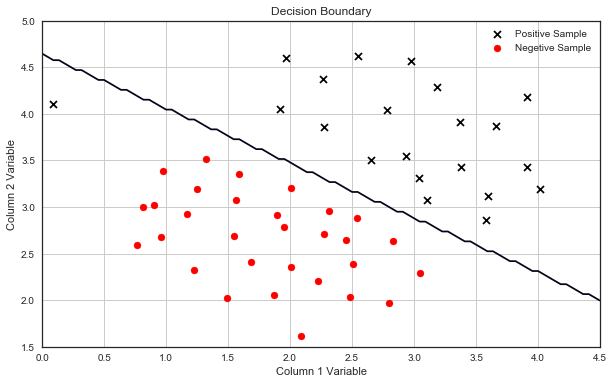

In [5]:
linearSVM = svm.LinearSVC(C = 1)
linearSVM.fit(x, y.flatten())
plotData()
plotBoundary(linearSVM,0,4.5,1.5,5)

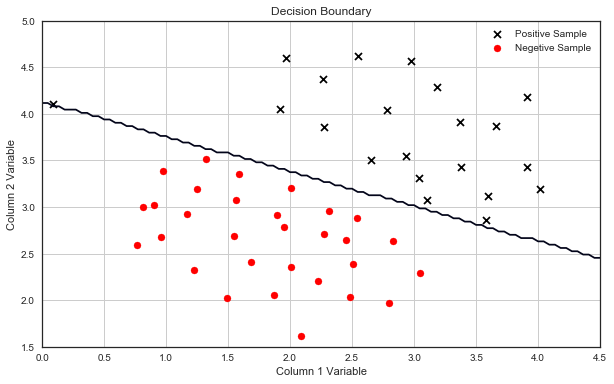

In [6]:
linearSVM = svm.LinearSVC(C = 100)
linearSVM.fit(x, y.flatten())
plotData()
plotBoundary(linearSVM,0,4.5,1.5,5)

In [33]:
def gaussianKerenl (x1, x2, sigma):
    return np.exp(-np.sum(np.square(x1 - x2)) / (2 * np.square(sigma)))